Define these constants:

In [133]:
import os.path

# LOAD_FILES_CAP = 50  # for testing load only some files (loading slow)
LOAD_FILES_CAP = None
# output_root = '/Users/adam/pschool/bakalarka/cryptic_output/output'  # unzipped tree with json outputs
output_root = '/Users/adam/pschool/bakalarka/cryptic_output/output 2'  # unzipped tree with json outputs

In [134]:
import json
from pathlib import Path
from typing import Iterable

import pandas as pd


def load_df(json_files: Iterable[Path]):
    super_df = pd.DataFrame()

    json_files = list(json_files)
    if LOAD_FILES_CAP:
        json_files = list(json_files)[:LOAD_FILES_CAP]  # testing hack

    total_files = len(json_files)

    for i, json_file in enumerate(json_files):
        with json_file.open() as f:
            json_output = json.load(f)

        # todo automatize so meta fields are all above the records (this should be the default!, what's the point
        # in listing them?)
        df = pd.json_normalize(json_output, 'binding_sites', ['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id', 'apo_label_asym_id', 'holo_label_asym_id'])
        super_df = pd.concat([super_df, df], ignore_index=True)

        if i % 10 == 0:
            print(f'\rloading... {i} / {total_files} done', end='')

    return super_df

In [135]:
import pickle

files = Path(output_root).rglob('*.json')

if os.path.exists('df.pickle'):
    # load pickled df
    with open('df.pickle', 'rb') as handle:
        df = pickle.load(handle)
else:
    df = load_df(files)

In [374]:

# show_bs(df.iloc[0])
# todo, aby se to dalo zobrazit v pymolu, asi to chce auth_seq_id...
import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/adam/pschool/bakalarka/cryptic_binding_sites/data_processing/utils.py'>

In [136]:
# je klidne vetsi nez pocet paru, protoze je radek za kazdy ligand, nikoliv pár...
df

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,analyses.method4.apo_bs_blocked_residues__by_blocking_atoms,atom_count_statistic.binding_atoms,atom_count_statistic.binding_atoms_observed_in_apo,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id
0,RFT,[157],0.235313,0.255749,0.255749,108.813930,106.436640,1,1,1,...,1,6,6,6,0,4,6wyg,6wyf,A,A
1,RFT,"[164, 45, 94]",0.577257,0.614879,0.614879,82.939834,85.420435,0,0,0,...,0,3,3,17,0,4,6wyg,6wyh,A,B
2,RFT,[157],0.317696,0.314098,0.314098,108.550272,109.494690,0,0,0,...,0,5,5,6,0,0,6wyg,6wyh,A,B
3,RFT,[157],0.346098,0.366367,0.366367,108.722998,106.436640,0,0,0,...,0,6,6,6,0,4,6wyg,6wyf,C,A
4,RFT,"[164, 45, 94]",0.730723,0.849326,0.849326,87.476912,85.420435,0,0,0,...,0,3,3,17,0,4,6wyg,6wyh,C,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1737105,IXZ,"[217, 116, 35, 81, 304, 221, 219, 33, 79, 226,...",35.815914,35.041840,35.041840,383.087170,397.146905,5,4,5,...,1,35,35,118,103,0,5p3l,3wz6,A,A
1737106,IXY,"[302, 37, 33, 79, 125, 221, 116, 35, 119, 304,...",35.949269,35.866933,35.866933,465.143603,498.159988,19,16,10,...,3,41,41,159,143,0,5p3l,3wz7,A,A
1737107,IXV,"[83, 300, 33, 80, 10, 222, 226, 79, 221, 116, ...",54.334508,54.377497,54.377497,453.171410,445.745519,8,6,7,...,1,36,36,140,121,0,5p3l,3wz8,A,A
1737108,PEG,"[68, 90, 67, 62, 61, 69]",54.554148,54.548213,54.548213,142.983098,131.290774,3,3,3,...,0,13,13,44,41,3,5p3l,3wz8,A,A


In [ ]:
unfiltered_df = df

In [302]:
df['bs_residue_count'] = df.residue_ids.apply(len)

In [163]:
df.sort_values('atom_count_statistic.binding_atoms')[:10]



,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,holo_to_apo_sasa_ratio
802931,LYE,[47],61.122765,61.122765,61.122765,61.416960,66.857679,2,1,1,...,7,1j1x,6syc,Y,A,1.0,1,1.0,0.081378,1.088587
270815,GOL,[8],0.123118,0.123118,0.123118,36.750266,36.998750,0,0,0,...,0,5p6g,5qbf,A,A,0.0,1,0.0,0.006716,1.006761
896736,GOL,[8],46.514777,46.514777,46.514777,37.043583,36.998750,0,0,0,...,0,5r39,5qbf,A,A,0.0,1,0.0,-0.001212,0.998790
1288313,LYE,[47],17.407658,17.407658,17.407658,67.483913,66.857679,0,0,0,...,7,2lzt,6syc,A,A,0.0,1,0.0,-0.009367,0.990720
1015522,LYE,[47],17.951914,17.951914,17.951914,66.079674,66.857679,0,0,0,...,7,1lpi,6syc,A,A,0.0,1,0.0,0.011637,1.011774
656281,LYE,[47],18.137630,18.137630,18.137630,67.545510,66.857679,0,0,0,...,7,1jit,6syc,A,A,0.0,1,0.0,-0.010288,0.989817
1203272,GOL,[8],0.022000,0.022000,0.022000,36.457089,36.520495,0,0,0,...,0,5p7l,5qba,A,A,0.0,1,0.0,0.001736,1.001739
470718,GOL,[8],0.098266,0.098266,0.098266,37.210093,36.998750,0,0,0,...,0,5ozx,5qbf,A,A,0.0,1,0.0,-0.005712,0.994320
896715,GOL,[8],46.475913,46.475913,46.475913,37.043583,36.520495,0,0,0,...,0,5r39,5qba,A,A,0.0,1,0.0,-0.014323,0.985879
470697,GOL,[8],0.137135,0.137135,0.137135,37.210093,36.520495,0,0,0,...,0,5ozx,5qba,A,A,0.0,1,0.0,-0.018882,0.981467


 Correct for the error in ligand binding specificity cutoff. (Was meant to be 6  _polypeptide_ residues within 4.5 angstroems. Due to a bug, it was Bio.Chain residues, which also include hetero residues like water and non-peptide ligands.)

However, now we have the correct count of binding residues (the polypeptide ones), but not within 4.5 Angstroems, but withing 4 A°. So filter it to at least 5 binding residues.


In [303]:
df = df[df['bs_residue_count'] > 5]

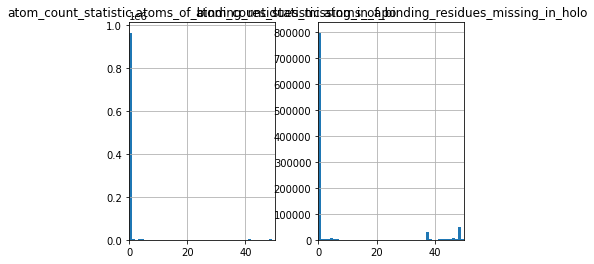

In [304]:
# Use for subsequent analyses only those that have atom_count_statistic.binding_atoms_observed_in_apo == atom_count_statistic.binding_atoms (more reasonable to compare the SASA)

len(df[df['atom_count_statistic.binding_atoms_observed_in_apo']==df['atom_count_statistic.binding_atoms']])
df = df[df['atom_count_statistic.binding_atoms_observed_in_apo']==df['atom_count_statistic.binding_atoms']]

# todo missing atom of BS residues = 0, apo and holo (would even be better when comparing the SASA)
# df = df[]
# first inspect
subplots = df.hist(column=['atom_count_statistic.atoms_of_binding_residues_missing_in_apo', 'atom_count_statistic.atoms_of_binding_residues_missing_in_holo'], bins=range(100))

for sp in subplots.reshape([-1]):
     sp.set_xlim((0,50))


In [305]:
# Use only those with missing atoms of BS residues = 0, apo and holo
# however this might remove larger BS from the ds? todo check that
print(len(df))
df = df[(df['atom_count_statistic.atoms_of_binding_residues_missing_in_holo'] == 0) & (df['atom_count_statistic.atoms_of_binding_residues_missing_in_apo'] == 0)]
print(len(df))

1042995
724636


In [307]:
print('binding sites', len(df))
print()
print('unique pairs', len(df[['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id']].drop_duplicates()))
print('unique apo chains', len(df[['apo_pdb_code', 'apo_chain_id']].drop_duplicates()))
print('unique holo chains', len(df[['holo_pdb_code', 'holo_chain_id']].drop_duplicates()))
print('unique apo structures', df['apo_pdb_code'].nunique())
print('unique holo structures', df['holo_pdb_code'].nunique())

binding sites 724636

unique pairs 527937
unique apo chains 23089
unique holo chains 39113
unique apo structures 13295
unique holo structures 22622


## Blocking atoms method

In [308]:
# pro histogram podílu blocked_BS_atoms / BS_atoms

df['blocked_bs_atoms__ratio'] = df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] / df['atom_count_statistic.binding_atoms_observed_in_apo']


df['blocked_bs_residues__ratio'] = df['analyses.method4.apo_bs_blocked_residues__by_blocking_atoms'] / df.bs_residue_count


<AxesSubplot:xlabel='blocked_bs_atoms__ratio', ylabel='Proportion'>

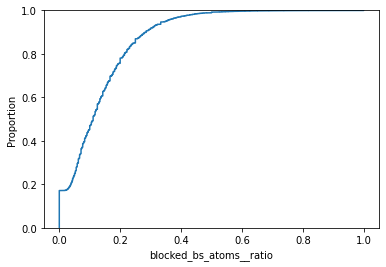

In [309]:
import seaborn as sns

sns.ecdfplot(df, x='blocked_bs_atoms__ratio')

<AxesSubplot:xlabel='blocked_bs_residues__ratio', ylabel='Proportion'>

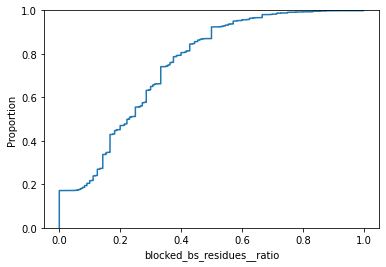

In [310]:
sns.ecdfplot(df, x='blocked_bs_residues__ratio')

In [378]:
blocked_cryptic = df[df.blocked_bs_atoms__ratio >= 0.4].sort_values('blocked_bs_atoms__ratio', ascending=False)
blocked_cryptic

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,apo_to_holo_sasa_ratio
1656180,PEG,"[48, 39, 40, 37, 36, 44]",142.380396,147.600780,147.600780,126.356013,188.135392,29,14,9,...,0,4ygo,4r57,A,C,1.0,6,1.000000,0.328377,0.671623
1549142,GOL,"[96, 11, 15, 95, 9, 10]",9.231441,8.725541,8.725541,22.356287,88.813572,39,11,11,...,0,3gmn,6ojp,B,B,1.0,6,1.000000,0.748278,0.251722
183893,PC,"[150, 81, 61, 138, 139, 140, 147]",63.342694,64.005020,64.005020,167.224165,150.832056,44,14,14,...,0,3pvn,1b09,F,C,1.0,7,1.000000,-0.108678,1.108678
39523,GOL,"[10, 97, 15, 11, 12, 99, 95]",52.677318,51.575775,51.575775,82.979075,116.792281,25,13,11,...,0,1wbz,1mwa,D,L,1.0,7,1.000000,0.289516,0.710484
1605916,MA4,"[192, 218, 210, 252, 249, 220]",10.427218,8.831694,8.831694,4.964168,72.714553,18,13,6,...,0,3c4o,2h5s,A,A,1.0,6,1.000000,0.931731,0.068269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633483,R8S,"[370, 369, 380, 372, 313, 104, 371]",40.083494,40.443009,40.443009,108.216609,124.294203,12,8,8,...,0,5p73,5r1v,A,A,0.4,7,0.714286,0.129351,0.870649
1050145,MYR,"[351, 328, 216, 210, 213, 209, 324]",39.343010,37.771679,37.771679,169.952461,163.323874,5,3,4,...,0,4g03,2bxm,A,A,0.4,7,0.285714,-0.040586,1.040586
636124,8OG,"[38, 153, 15, 83, 84, 71, 16]",75.746992,76.270630,76.270630,295.381840,277.359574,11,7,9,...,0,5qj4,3l85,B,B,0.4,7,0.571429,-0.064978,1.064978
1499616,FCL,"[38, 42, 41, 78, 82, 81]",37.093198,37.086615,37.086615,154.196293,176.009341,11,5,6,...,0,1qmz,1okw,B,B,0.4,6,0.500000,0.123931,0.876069


In [383]:
ex = blocked_cryptic.iloc[2010]
print(ex.ligand)
print(ex.blocked_bs_atoms__ratio)
utils.show_bs(ex)

S5J
0.6153846153846154


### Binding site size

dává smysl, že takto definované cryptic budou mít méně binding atoms v průměru, ale asi to není tak hrozné:

In [311]:
print('median binding site size:', df['atom_count_statistic.binding_atoms'].median())

median binding site size: 20.0


kdyby cryptic := df.blocked_bs_atoms__ratio > 0.4

In [312]:
print('cryptic median binding site size:', df[df.blocked_bs_atoms__ratio > 0.4]['atom_count_statistic.binding_atoms'].median())
print('non-cryptic median binding site size:', df[df.blocked_bs_atoms__ratio <= 0.4]['atom_count_statistic.binding_atoms'].median())


cryptic median binding site size: 18.0
non-cryptic median binding site size: 20.0


kdyby cryptic := df.blocked_bs_atoms__ratio > 0.2

In [313]:
print('cryptic median binding site size:', df[df.blocked_bs_atoms__ratio > 0.2]['atom_count_statistic.binding_atoms'].median())
print('non-cryptic median binding site size:', df[df.blocked_bs_atoms__ratio <= 0.2]['atom_count_statistic.binding_atoms'].median())

cryptic median binding site size: 19.0
non-cryptic median binding site size: 20.0


## Aggregation

Rows are now binding sites. Aggregate them by pair, and by apo chain. As representative rows for each pair/apo_chain use the binding sites most likely to be cryptic, i.e. those with maximal blocked_bs_atoms__ratio.

In [314]:
# aggregated by pair (i.e. a pair has multiple binding sites -> choose max/min/avg from the describing values)
def groupby_and_select(df, column, groupby, min_or_max: str):
    assert min_or_max in ('min', 'max')
    ascending = True if min_or_max == 'min' else False
    return df.sort_values(column, ascending=ascending).drop_duplicates(groupby)

def aggregate_BS(df, based_on_quantity: str):
    pair_id_columns = ['apo_pdb_code', 'holo_pdb_code', 'apo_chain_id', 'holo_chain_id']

    min_pairs = groupby_and_select(df, based_on_quantity, pair_id_columns, 'min')
    max_pairs = groupby_and_select(df, based_on_quantity, pair_id_columns, 'max')
    avg_pairs = df.groupby(pair_id_columns).agg('mean')


    # aggregated by apo chain
    apo_chain_columns = ['apo_pdb_code', 'apo_chain_id']
    min_apo_chains = groupby_and_select(df, based_on_quantity, apo_chain_columns, 'min')
    max_apo_chains = groupby_and_select(df, based_on_quantity, apo_chain_columns, 'max')
    avg_apo_chains = df.groupby(apo_chain_columns).agg('mean')

    return {'pairs': {'min':min_pairs, 'max': max_pairs, 'avg':avg_pairs},
            'apo_chains': {'min': min_apo_chains, 'max':max_apo_chains, 'avg':avg_apo_chains}}



In [315]:
blocked_bs_aggregate = aggregate_BS(df,
    'blocked_bs_atoms__ratio')
(min_pairs, max_pairs, avg_pairs), (min_apo_chains, max_apo_chains, avg_apo_chains) = (d.values() for d in blocked_bs_aggregate.values())

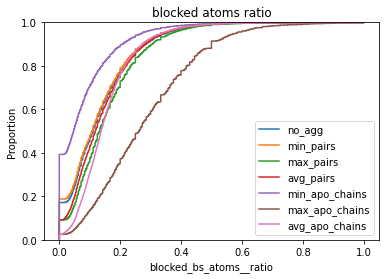

In [317]:
sns.ecdfplot(df, x='blocked_bs_atoms__ratio', label='no_agg')
ax = sns.ecdfplot(min_pairs, x='blocked_bs_atoms__ratio', label='min_pairs')
sns.ecdfplot(max_pairs, x='blocked_bs_atoms__ratio', label='max_pairs')
sns.ecdfplot(avg_pairs, x='blocked_bs_atoms__ratio', label='avg_pairs')

sns.ecdfplot(min_apo_chains, x='blocked_bs_atoms__ratio', label='min_apo_chains')
sns.ecdfplot(max_apo_chains, x='blocked_bs_atoms__ratio', label='max_apo_chains').set_title('blocked atoms ratio')
sns.ecdfplot(avg_apo_chains, x='blocked_bs_atoms__ratio', label='avg_apo_chains')

ax.legend()

# todo taky by slo min_max_chains (min pres binding sites, max pres pairs a obracene treba)

Min pairs = páry, kde za reprezentativní binding site vyberu tu minimální (minimální wrt. blocked atoms ratio)
Max pairs obdobně.
Avg - všechny hodnoty pro všechny binding sites (k danému páru) se vyprůměrují (nemusí dávat smysl)

Min apo chains - apo chainy, za reprezentativní binding site vybírám tu minimální ve všech párech i jejich binding sites

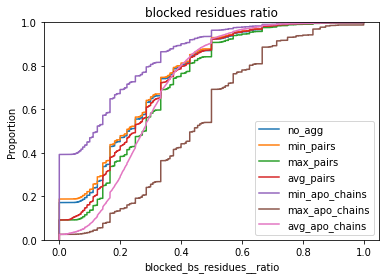

In [318]:
sns.ecdfplot(df, x='blocked_bs_residues__ratio', label='no_agg')
ax = sns.ecdfplot(min_pairs, x='blocked_bs_residues__ratio', label='min_pairs')
sns.ecdfplot(max_pairs, x='blocked_bs_residues__ratio', label='max_pairs')
sns.ecdfplot(avg_pairs, x='blocked_bs_residues__ratio', label='avg_pairs')


sns.ecdfplot(min_apo_chains, x='blocked_bs_residues__ratio', label='min_apo_chains')
sns.ecdfplot(max_apo_chains, x='blocked_bs_residues__ratio', label='max_apo_chains').set_title('blocked residues ratio')
sns.ecdfplot(avg_apo_chains, x='blocked_bs_residues__ratio', label='avg_apo_chains')
ax.legend()


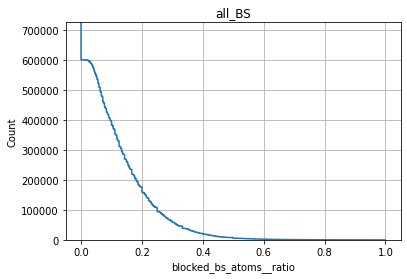

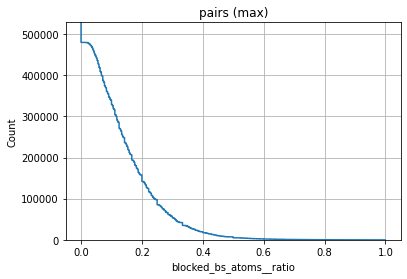

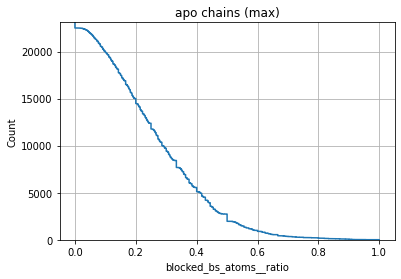

In [319]:
from matplotlib import pyplot as plt



for label, bs_df in (('all_BS',df), ('pairs (max)', max_pairs), ('apo chains (max)', max_apo_chains)):
    sns.ecdfplot(bs_df, x='blocked_bs_atoms__ratio', stat='count', complementary=True).set_title(label)
    plt.grid()
    plt.show()


In [320]:
print('max_apo_chains median binding site size:', max_apo_chains['atom_count_statistic.binding_atoms'].median())

max_apo_chains median binding site size: 19.0


In [321]:
import numpy as np
print(len(max_apo_chains))
for lower_bound in np.arange(0, 1, 0.1):
    cryptic = max_apo_chains[max_apo_chains.blocked_bs_atoms__ratio >= lower_bound]
    count = len(cryptic)
    print(f'lower bound: {lower_bound:.1f}, count:{count}, percent {100*count/len(max_apo_chains):.0f}, '
          f'BS size mean [atoms]: {cryptic["atom_count_statistic.binding_atoms"].mean():.1f}, '
          f'median: {cryptic["atom_count_statistic.binding_atoms"].median()}, '
          f'stddev: {cryptic["atom_count_statistic.binding_atoms"].std():.1f}',
          )


23089
lower bound: 0.0, count:23089, percent 100, BS size mean [atoms]: 23.4, median: 19.0, stddev: 13.6
lower bound: 0.1, count:20037, percent 87, BS size mean [atoms]: 22.8, median: 19.0, stddev: 13.0
lower bound: 0.2, count:15008, percent 65, BS size mean [atoms]: 20.7, median: 17.0, stddev: 11.2
lower bound: 0.3, count:9423, percent 41, BS size mean [atoms]: 18.2, median: 16.0, stddev: 9.0
lower bound: 0.4, count:5563, percent 24, BS size mean [atoms]: 16.5, median: 15.0, stddev: 7.6
lower bound: 0.5, count:2743, percent 12, BS size mean [atoms]: 15.9, median: 14.0, stddev: 6.9
lower bound: 0.6, count:906, percent 4, BS size mean [atoms]: 15.7, median: 14.0, stddev: 6.1
lower bound: 0.7, count:357, percent 2, BS size mean [atoms]: 15.7, median: 14.0, stddev: 5.8
lower bound: 0.8, count:217, percent 1, BS size mean [atoms]: 15.7, median: 14.0, stddev: 5.8
lower bound: 0.9, count:83, percent 0, BS size mean [atoms]: 16.4, median: 20.0, stddev: 5.5


In [322]:
df["atom_count_statistic.binding_atoms"].describe()

count    724636.000000
mean         23.880768
std          12.433075
min           6.000000
25%          15.000000
50%          20.000000
75%          29.000000
max         302.000000
Name: atom_count_statistic.binding_atoms, dtype: float64

## SASA

<AxesSubplot:xlabel='analyses.method3.bs_atoms_sasa__apo', ylabel='analyses.method3.bs_atoms_sasa__holo'>

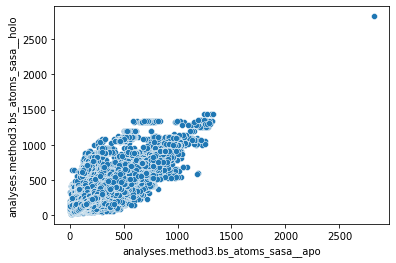

In [323]:
sns.scatterplot(data=df, x='analyses.method3.bs_atoms_sasa__apo', y='analyses.method3.bs_atoms_sasa__holo')


In [324]:


# also compare (on a scatter with BS SASA and the rmsd)
df['sasa_decrease_in_apo']  = (df['analyses.method3.bs_atoms_sasa__holo'] - df['analyses.method3.bs_atoms_sasa__apo']) / df['analyses.method3.bs_atoms_sasa__holo']


# [done] ttodo, not exactly intuitive, better would be to have holo as denominator, as 1 should be the holo, not apo (which isn't the origin of the BS).
df['apo_to_holo_sasa_ratio'] =  df['analyses.method3.bs_atoms_sasa__apo'] / df['analyses.method3.bs_atoms_sasa__holo']




In [389]:
# show those that have lower sasa in holo
dfx = df.sort_values('apo_to_holo_sasa_ratio', ascending=False)
dfx

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,apo_to_holo_sasa_ratio
822406,XYP,"[169, 196, 242, 222, 141, 90, 91, 14, 137, 135...",46.576486,46.598084,46.598084,397.920220,53.690579,17,12,16,...,0,3m9w,3ma0,A,B,0.121212,11,0.363636,-6.411360,7.411360
822405,XYP,"[16, 242, 169, 196, 222, 90, 91, 141, 14, 137,...",55.518265,55.586959,55.586959,385.236262,52.028777,17,12,16,...,0,3m9w,3ma0,A,A,0.121212,11,0.363636,-6.404292,7.404292
822407,XYP,"[169, 196, 91, 222, 90, 14, 137, 141, 135, 16,...",21.496170,21.944515,21.944515,399.649789,55.145148,19,12,16,...,0,3m9w,3ma0,A,C,0.151515,11,0.454545,-6.247234,7.247234
1533311,SER,"[101, 121, 90, 148, 96, 128, 119, 122, 146, 103]",106.220635,105.578154,105.578154,301.039056,49.707926,33,15,16,...,0,6iop,6iou,A,A,0.250000,10,0.500000,-5.056158,6.056158
906156,TYR,"[245, 113, 114, 93, 221, 216, 34, 92, 258, 112...",39.262538,39.421878,39.421878,471.618896,81.455140,15,11,13,...,0,6hnk,6hni,A,A,0.044444,17,0.117647,-4.789922,5.789922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968030,NTA,"[63, 124, 296, 206, 188, 125, 95]",32.362772,32.947192,32.947192,1.768046,197.982954,55,22,13,...,0,1a8f,4h0w,A,A,0.750000,7,0.857143,0.991070,0.008930
968019,NTA,"[63, 124, 296, 206, 188, 125, 95]",40.663676,41.279100,41.279100,1.658134,197.982954,56,23,14,...,0,1a8e,4h0w,A,A,0.812500,7,1.000000,0.991625,0.008375
1606002,MA4,"[273, 213, 239, 216, 231, 270]",10.554716,9.953408,9.953408,0.000000,99.318840,16,9,5,...,0,3c4p,4gd6,A,A,0.500000,6,0.666667,1.000000,0.000000
1605878,MA4,"[273, 213, 239, 216, 231, 270]",12.652375,12.391729,12.391729,0.000000,99.318840,16,10,6,...,0,2g2u,4gd6,A,A,0.500000,6,0.666667,1.000000,0.000000


In [407]:
ex = dfx.iloc[10000]
print(ex.apo_to_holo_sasa_ratio)
print(ex)
utils.show_bs(ex)


1.4958496555376386
ligand                                                                                                            AMP
residue_ids                                                         [53, 83, 57, 59, 36, 82, 32, 31, 85, 89, 58, 3...
analyses.method1.heavy_rmsd                                                                                 41.744556
analyses.method1.carbon_rmsd                                                                                41.365361
analyses.method1.c_alpha_rmsd                                                                               41.365361
analyses.method3.bs_atoms_sasa__apo                                                                        376.958151
analyses.method3.bs_atoms_sasa__holo                                                                       252.002699
analyses.method4.new_apo_bs_contacts__atom                                                                         19
analyses.method4.new_apo_bs_contacts_

In [405]:
utils.show_bs(dfx.iloc[800])


KeyboardInterrupt: 

(0.0, 4.0)

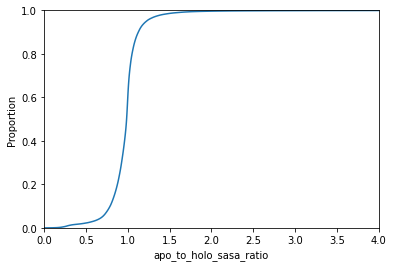

In [325]:
ax = sns.ecdfplot(df, x='apo_to_holo_sasa_ratio')
ax.set_xlim((0, 4))


In [326]:
sasa_cryptic = df[(df.apo_to_holo_sasa_ratio <= 0.75) & (df['bs_residue_count'] >= 5)]
sasa_cryptic = sasa_cryptic.sort_values('apo_to_holo_sasa_ratio', ascending=False)
sasa_cryptic

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,apo_to_holo_sasa_ratio
1592132,DHY,"[293, 251, 248, 155, 243, 250, 200, 269, 192, ...",77.336617,77.216232,77.216232,70.946897,94.596511,28,18,19,...,0,5trx,1q0c,C,A,0.075000,14,0.214286,0.250005,0.749995
831514,MPD,"[95, 97, 15, 11, 14, 10, 13]",7.212091,6.547156,6.547156,75.232841,100.311805,12,5,7,...,0,3tbs,1lk2,E,B,0.045455,7,0.142857,0.250010,0.749990
1445840,GOL,"[22, 73, 15, 14, 21, 17, 20, 16]",8.377315,8.184100,8.184100,91.525553,122.035805,14,9,11,...,0,5wke,2av7,B,B,0.208333,8,0.625000,0.250011,0.749989
638592,6AF,"[10, 132, 82, 83, 84, 144, 134, 18, 86, 89, 85...",35.636605,35.428876,35.428876,258.375104,344.505284,47,23,20,...,0,1pw2,5iex,A,A,0.261905,16,0.500000,0.250011,0.749989
189003,A32,"[90, 91, 56, 12, 51, 88, 57, 61, 11]",97.622287,98.590694,98.590694,265.117725,353.496981,26,17,14,...,0,1lts,1jqy,D,O,0.193548,9,0.666667,0.250014,0.749986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968030,NTA,"[63, 124, 296, 206, 188, 125, 95]",32.362772,32.947192,32.947192,1.768046,197.982954,55,22,13,...,0,1a8f,4h0w,A,A,0.750000,7,0.857143,0.991070,0.008930
968019,NTA,"[63, 124, 296, 206, 188, 125, 95]",40.663676,41.279100,41.279100,1.658134,197.982954,56,23,14,...,0,1a8e,4h0w,A,A,0.812500,7,1.000000,0.991625,0.008375
1606002,MA4,"[273, 213, 239, 216, 231, 270]",10.554716,9.953408,9.953408,0.000000,99.318840,16,9,5,...,0,3c4p,4gd6,A,A,0.500000,6,0.666667,1.000000,0.000000
1605940,MA4,"[273, 213, 239, 216, 231, 270]",10.613424,9.999618,9.999618,0.000000,99.318840,16,10,6,...,0,3c4o,4gd6,A,A,0.500000,6,0.666667,1.000000,0.000000


(0.0, 15.0)

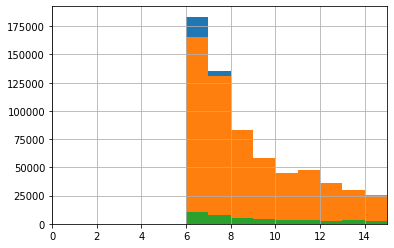

In [327]:
df['bs_residue_count'].hist(bins=range(0, 100)).set_xlim((0, 15))
df[df['atom_count_statistic.binding_atoms'] > 10]['bs_residue_count'].hist(bins=range(0, 100)).set_xlim((0, 15))
sasa_cryptic['bs_residue_count'].hist(bins=range(0, 100)).set_xlim((0, 15))

Však my můžeme nastavit bs_residue_count >=5 nebo 6 /done

### Aggregate based on apo_to_holo_sasa_ratio

In [396]:
sasa_aggregate = aggregate_BS(df,
    'apo_to_holo_sasa_ratio')

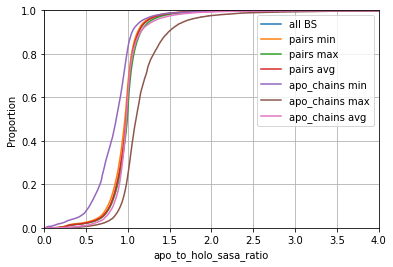

In [397]:
ax = sns.ecdfplot(df, x='apo_to_holo_sasa_ratio', label='all BS')

for agg_level, aggs in sasa_aggregate.items():
    for agg_type, bs_df in aggs.items():
        ax = sns.ecdfplot(bs_df, x='apo_to_holo_sasa_ratio', label=f'{agg_level} {agg_type}')

ax.set_xlim((0,4))
ax.legend()
plt.grid()

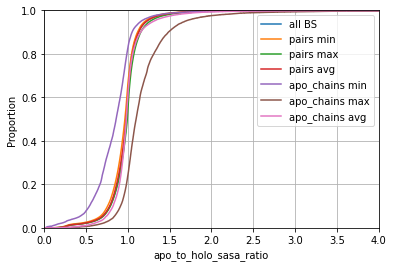

In [398]:
def f():
    df_non_bs_bs = df[df['atom_count_statistic.binding_atoms'] >= 10]

    sasa_aggregate = aggregate_BS(df_non_bs_bs,
                                  'apo_to_holo_sasa_ratio')
    ax = sns.ecdfplot(df_non_bs_bs, x='apo_to_holo_sasa_ratio', label='all BS')

    for agg_level, aggs in sasa_aggregate.items():
        for agg_type, bs_df in aggs.items():
            ax = sns.ecdfplot(bs_df, x='apo_to_holo_sasa_ratio', label=f'{agg_level} {agg_type}')

    ax.set_xlim((0, 4))
    ax.legend()
    plt.grid()
f()

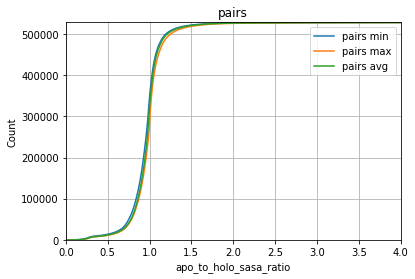

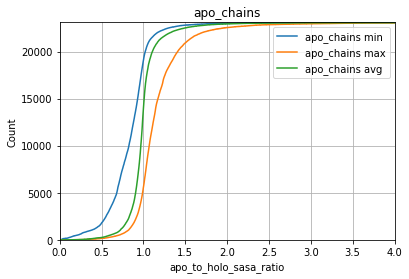

In [399]:
# todo agg level random makes probably more sense than mean

for agg_level, aggs in sasa_aggregate.items():
    for agg_type, bs_df in aggs.items():
        ax = sns.ecdfplot(bs_df, x='apo_to_holo_sasa_ratio', stat='count', label=f'{agg_level} {agg_type}')
    ax.set_xlim((0,4))
    ax.set_title(agg_level)
    ax.legend()
    plt.grid()
    plt.show()


In [395]:
ex = sasa_cryptic.iloc[1]
print(ex.ligand)
print(ex.apo_to_holo_sasa_ratio)
utils.show_bs(ex)

MPD
0.7499899003268986


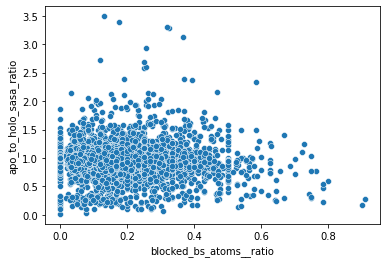

In [334]:
ax = sns.scatterplot(data=df.sample(10000), x='blocked_bs_atoms__ratio', y='apo_to_holo_sasa_ratio')

(0.0, 4.0)

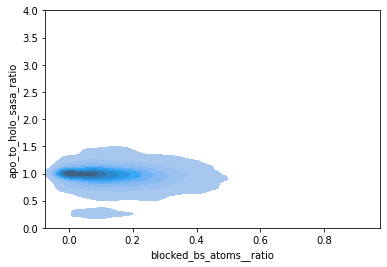

In [369]:
ax = sns.kdeplot(data=df.sample(10000), x='blocked_bs_atoms__ratio', y='apo_to_holo_sasa_ratio',
                 fill=True, )#thresh=0, levels=100, cmap="mako")
ax.set_ylim((0, 4))


Why no correlation? ^^

In [370]:
def compute_corr(df, method='pearson'):
    print(df[['apo_to_holo_sasa_ratio', 'blocked_bs_atoms__ratio']].corr(method=method))
    print(df[(0.5 <= df.apo_to_holo_sasa_ratio) &(df.apo_to_holo_sasa_ratio <= 4) ][['apo_to_holo_sasa_ratio', 'blocked_bs_atoms__ratio']].corr(method=method))

compute_corr(df, 'kendall')
compute_corr(df[df['atom_count_statistic.binding_atoms'] >= 10], 'kendall')

                         apo_to_holo_sasa_ratio  blocked_bs_atoms__ratio
apo_to_holo_sasa_ratio                 1.000000                -0.094173
blocked_bs_atoms__ratio               -0.094173                 1.000000
                         apo_to_holo_sasa_ratio  blocked_bs_atoms__ratio
apo_to_holo_sasa_ratio                 1.000000                -0.087439
blocked_bs_atoms__ratio               -0.087439                 1.000000
                         apo_to_holo_sasa_ratio  blocked_bs_atoms__ratio
apo_to_holo_sasa_ratio                 1.000000                -0.093628
blocked_bs_atoms__ratio               -0.093628                 1.000000
                         apo_to_holo_sasa_ratio  blocked_bs_atoms__ratio
apo_to_holo_sasa_ratio                 1.000000                -0.086702
blocked_bs_atoms__ratio               -0.086702                 1.000000


Corr not great, but at least negative..

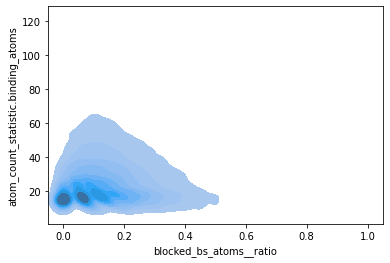

(0.0, 4.0)

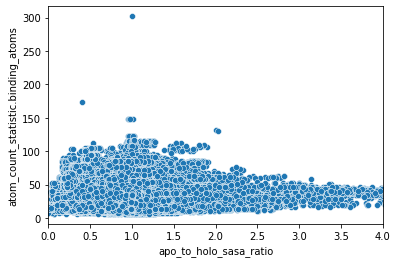

In [337]:
# ax = sns.scatterplot(data=df, x='blocked_bs_atoms__ratio', y='atom_count_statistic.binding_atoms')#thresh=0,
ax = sns.kdeplot(data=df.sample(int(1e5)), fill=True, x='blocked_bs_atoms__ratio', y='atom_count_statistic.binding_atoms')#thresh=0,
plt.show()
# levels=100, cmap="mako")
# df['atom_count_statistic.binding_atoms']
ax = sns.scatterplot(data=df, x='apo_to_holo_sasa_ratio', y='atom_count_statistic.binding_atoms')#thresh=0, levels=100, cmap="mako")
ax.set_xlim((0, 4))




## RMSD

Je tam chyba (správné výsledky až při dalším spuštění), hodnoty nedávají smysl.

In [338]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,analyses.method4.apo_bs_blocked_residues,analyses.method4.apo_bs_blocking_atoms,...,atom_count_statistic.binding_atoms,atom_count_statistic.binding_atoms_observed_in_apo,atom_count_statistic.atoms_of_binding_residues_in_both,atom_count_statistic.atoms_of_binding_residues_missing_in_holo,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,apo_to_holo_sasa_ratio
count,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,...,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00,724636.00
mean,30.37,30.32,30.32,211.24,222.18,12.88,7.41,7.57,4.91,4.06,...,23.88,23.88,89.14,0.00,0.00,0.13,9.47,0.25,0.03,0.97
std,39.50,39.52,39.52,116.44,126.34,12.76,6.25,6.25,3.40,4.60,...,12.43,12.43,37.84,0.00,0.00,0.11,4.03,0.19,0.21,0.21
min,0.00,0.00,0.00,0.00,16.05,0.00,0.00,0.00,0.00,0.00,...,6.00,6.00,6.00,0.00,0.00,0.00,6.00,0.00,-6.41,0.00
25%,3.57,3.49,3.49,135.72,143.64,4.00,3.00,3.00,3.00,1.00,...,15.00,15.00,61.00,0.00,0.00,0.05,6.00,0.12,-0.03,0.90
50%,18.09,18.22,18.22,178.92,185.09,9.00,6.00,6.00,4.00,3.00,...,20.00,20.00,80.00,0.00,0.00,0.11,8.00,0.23,0.01,0.99
75%,42.56,42.52,42.52,255.96,263.14,17.00,10.00,10.00,6.00,6.00,...,29.00,29.00,107.00,0.00,0.00,0.19,11.00,0.36,0.10,1.03
max,983.15,983.05,983.05,2820.10,2824.90,170.00,93.00,96.00,46.00,63.00,...,302.00,302.00,725.00,0.00,0.00,1.00,95.00,1.00,1.00,7.41


In [339]:
print(len(df))

print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] == 1]))

print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] == 0]))


print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] >= 1]))
print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] > 1]))
print(len(df[df['analyses.method4.apo_bs_blocked_atoms__by_blocking_atoms'] <= 1]))

724636
132338
124383
600253
467915
256721


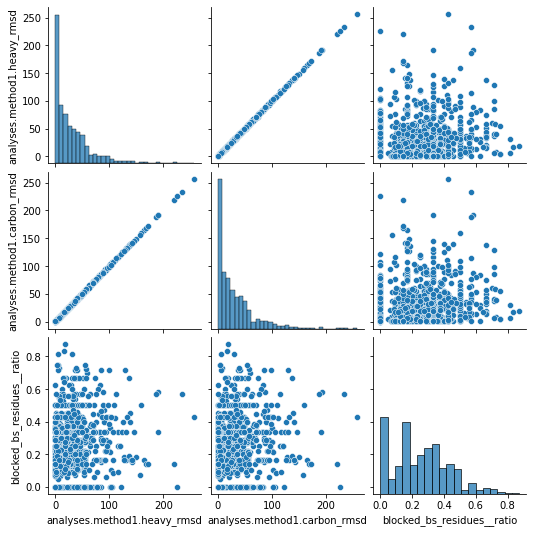

In [340]:
sns.pairplot(df.sample(1000), vars=['analyses.method1.heavy_rmsd', 'analyses.method1.carbon_rmsd', 'blocked_bs_residues__ratio'])

Manual test - pymol

In [341]:
df[df.blocked_bs_atoms__ratio > 0.4].sample(10, random_state=42)

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,apo_to_holo_sasa_ratio
833890,GOL,"[174, 66, 95, 68, 175, 113]",48.679983,48.636994,48.636994,73.397831,58.430791,17,12,8,...,0,3at2,4ib5,A,B,0.500000,6,0.666667,-0.256150,1.256150
1615341,LUR,"[15, 54, 108, 17, 121, 106]",12.557523,11.682679,11.682679,211.875308,207.934918,13,9,6,...,0,4pvl,4ik6,B,B,0.500000,6,0.666667,-0.018950,1.018950
374373,DO3,"[62, 101, 63, 103, 73, 75]",87.604087,88.300520,88.300520,272.211264,280.242810,22,5,11,...,0,5lyt,5c6j,A,A,0.642857,6,0.666667,0.028659,0.971341
212277,T2Y,"[144, 143, 26, 142, 41, 145]",6.264244,6.185920,6.185920,165.133296,205.395354,21,12,11,...,0,7bro,5reo,A,A,0.411765,6,0.666667,0.196022,0.803978
19085,182,"[72, 224, 98, 171, 165, 97, 200, 99, 223, 199,...",146.529292,147.432152,147.432152,417.184805,263.353193,50,22,22,...,0,1k3f,1u1e,D,D,0.592593,12,0.750000,-0.584127,1.584127
24685,LEU-ASN-LYS-TYR-GLN-GLY-PHE-ILE-PHE-ASP-ILE-VA...,"[68, 69, 33, 15, 65, 72, 16, 36]",19.279434,18.238909,18.238909,326.546670,265.390054,10,5,6,...,0,3g43,5dbr,C,A,0.428571,8,0.750000,-0.230440,1.230440
514688,2AN,"[72, 41, 63, 23, 43, 86, 74, 154, 152, 153, 15...",47.893876,47.999201,47.999201,72.436527,211.609312,56,30,24,...,0,1okw,4ez7,C,A,0.612903,13,0.846154,0.657687,0.342313
1049347,MYR,"[327, 347, 328, 216, 351, 212, 481, 482, 210, ...",38.389639,37.797587,37.797587,131.310870,164.422805,18,13,8,...,0,3jry,3a73,B,B,0.571429,11,0.636364,0.201383,0.798617
1049443,MYR,"[460, 415, 489, 411, 488, 457, 410, 387]",8.561934,8.879245,8.879245,82.152060,159.147990,14,11,10,...,0,4emx,1bj5,A,A,0.642857,8,0.875000,0.483801,0.516199
290836,A2G-GAL,"[43, 73, 60, 44, 64, 86, 84, 81]",11.691252,11.608665,11.608665,279.447919,246.689126,30,10,14,...,0,2zgn,3afk,A,B,0.461538,8,0.750000,-0.132794,1.132794


## Ligand specificity bug exploration

In [342]:
small_bs = df[df['atom_count_statistic.binding_atoms'] == 5]
small_bs

,ligand,residue_ids,analyses.method1.heavy_rmsd,analyses.method1.carbon_rmsd,analyses.method1.c_alpha_rmsd,analyses.method3.bs_atoms_sasa__apo,analyses.method3.bs_atoms_sasa__holo,analyses.method4.new_apo_bs_contacts__atom,analyses.method4.new_apo_bs_contacts__residue,analyses.method4.apo_bs_blocked_atoms,...,atom_count_statistic.atoms_of_binding_residues_missing_in_apo,apo_pdb_code,holo_pdb_code,apo_chain_id,holo_chain_id,blocked_bs_atoms__ratio,bs_residue_count,blocked_bs_residues__ratio,sasa_decrease_in_apo,apo_to_holo_sasa_ratio


In [343]:
ex = small_bs.iloc[0]
show_bs(ex)

IndexError: single positional indexer is out-of-bounds

In [ ]:
ex = small_bs.iloc[1]
show_bs(ex)